In [1]:
# Kirolous Shenouda
# July 28, 2021
# Film Rental Project
#
# This dataset containing film rental information comes from the Sakila Database, which was originally created by 
MySQL. I will beanalyzing some information and finding some insights from things like films, actors, stores, rentals and more.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
conn = sqlite3.connect('sakila.db')

In [4]:
df = pd.read_sql('''SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;''', conn, index_col = 'rental_id', parse_dates = ['rental_date', 'return_date'])

In [5]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [8]:
# The mean of film rental duration
df['film_rental_duration'].mean()

4.935489902767389

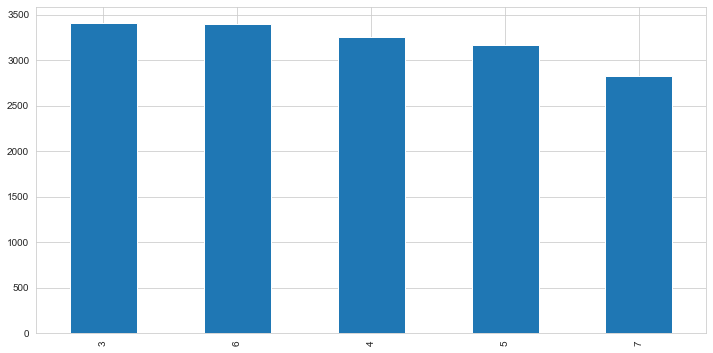

In [30]:
# The most common rental duration
df['film_rental_duration'].value_counts().plot(kind = 'bar', figsize = (12, 6))

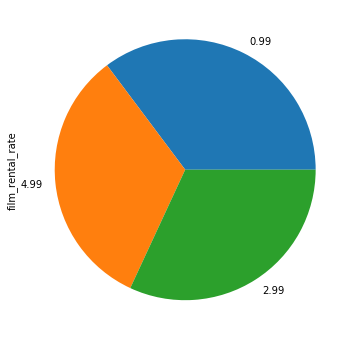

In [21]:
# The most common rental rate
# The bar chart fits the best in this case because the change between each rental rate is more apparent
df['film_rental_rate'].value_counts().plot(kind = 'pie', figsize = (12, 6))

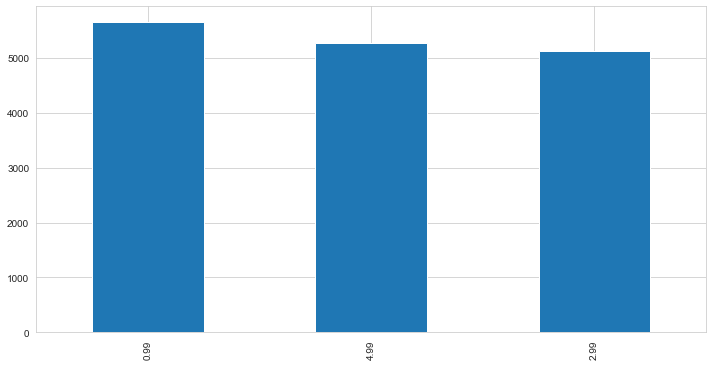

In [31]:
df['film_rental_rate'].value_counts().plot(kind = 'bar', figsize = (12, 6))

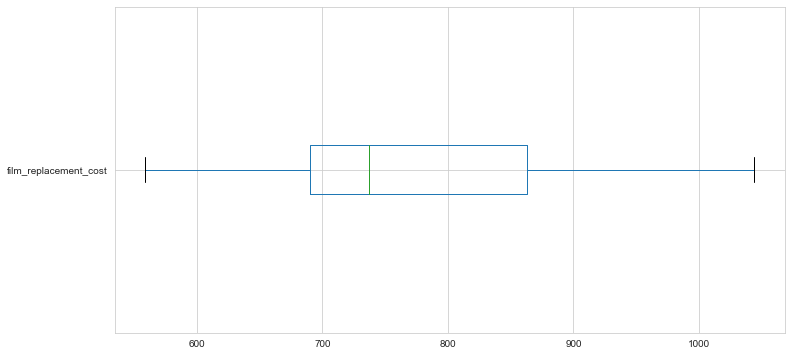

In [32]:
# The distribution of replacement cost
df['film_replacement_cost'].value_counts().plot(kind = 'box', vert = False, figsize = (12, 6))

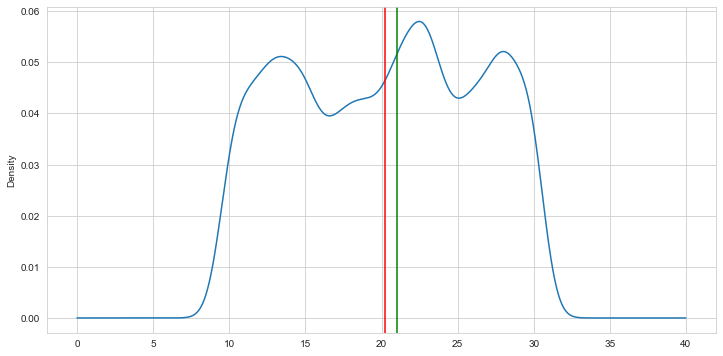

In [44]:
# The red line represents the film replacement cost mean, and the green represents the median
den = df['film_replacement_cost'].plot(kind = 'density', figsize = (12, 6))
den.axvline(df['film_replacement_cost'].mean(), color = 'red')
den.axvline(df['film_replacement_cost'].median(), color = 'green')

In [47]:
# Raw count of each film rating
df['film_rating'].value_counts()

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64

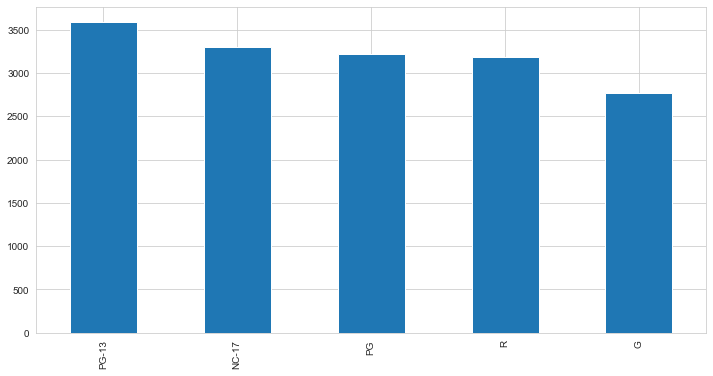

In [48]:
# According to the bar graph, the most common film rating is PG-13
df['film_rating'].value_counts().plot(kind = 'bar', figsize = (12, 6))

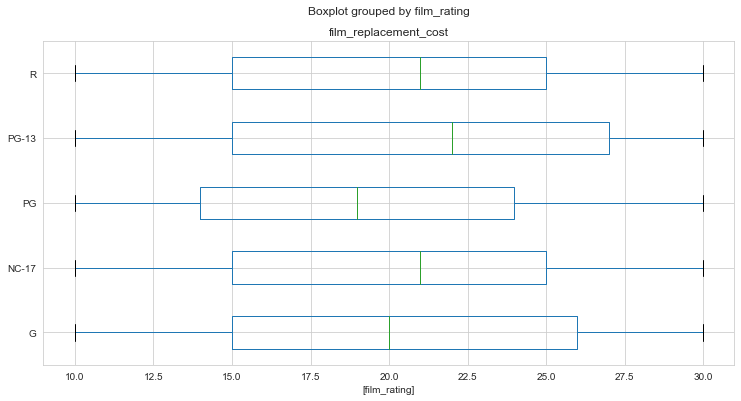

In [56]:
# These boxplots show that film replacement cost varies depending on the film rating, but not by much
# Films that are rated PG-13 generally cost a bit more to replace than films with other ratings
df[['film_rating', 'film_replacement_cost']].boxplot(by = 'film_rating', vert = False, figsize = (12, 6))

In [57]:
# I created a new column in df called rental days that shows the number of days between rental date and return date
df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis = 1)

In [58]:
df['rental_days'].head()

rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rental_days, dtype: float64

In [60]:
# The mean number of rental days: 4.5
df['rental_days'].mean()

4.525944139713763

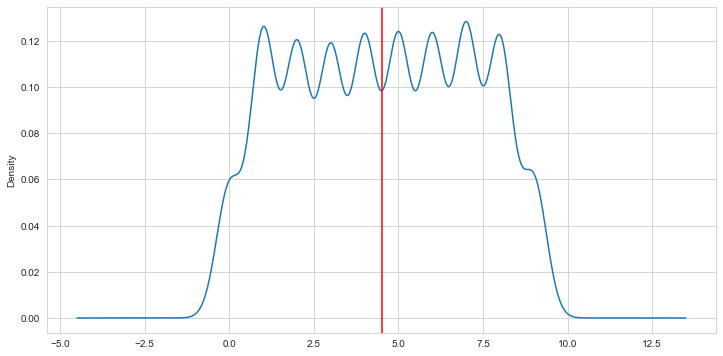

In [65]:
# The density plot of rental_days with the red line representing the mean
den2 = df['rental_days'].plot(kind = 'density', figsize = (12, 6))
den2.axvline(df['rental_days'].mean(), color = 'red')

In [67]:
# I created another column called film daily rental rate that calculates the quotient between film rental rate and film rental duration
df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']

In [68]:
df['film_daily_rental_rate'].head()

rental_id
1    0.427143
2    0.427143
3    0.427143
4    0.165000
5    0.598000
Name: film_daily_rental_rate, dtype: float64

In [69]:
# The mean of film daily rental rate: 0.646
df['film_daily_rental_rate'].mean()

0.6458262471655172

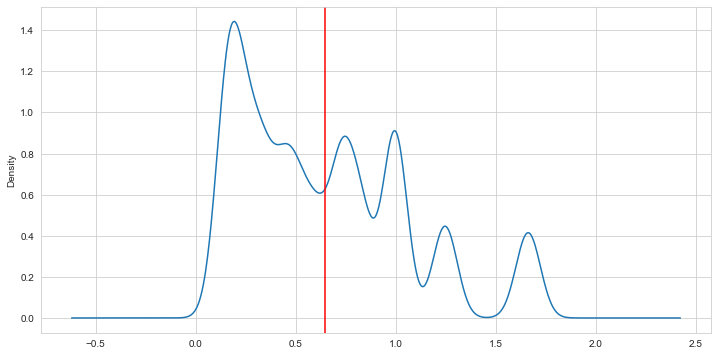

In [72]:
# The density plot of film daily rental rate with the red line representing the mean
den3 = df['film_daily_rental_rate'].plot(kind = 'density', figsize = (12, 6))
den3.axvline(df['film_daily_rental_rate'].mean(), color = 'red')

In [93]:
# The 10 films with the lowest daily rental rate
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].min()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
18,2005-05-25 01:10:47,2005-05-31 06:35:47,MARTINEZ,1,Lethbridge,ROMAN PUNK,7,0.99,28.99,NC-17,6.0,0.141429
37,2005-05-25 04:44:31,2005-05-29 01:03:31,ELROD,2,Woodridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,3.0,0.141429
48,2005-05-25 06:20:46,2005-06-02 05:42:46,CASTRO,1,Lethbridge,GUN BONNIE,7,0.99,27.99,G,7.0,0.141429
74,2005-05-25 11:09:48,2005-05-26 12:23:48,TERRY,2,Woodridge,GREEDY ROOTS,7,0.99,14.99,R,1.0,0.141429
76,2005-05-25 11:30:37,2005-06-03 12:00:37,SMITH,2,Woodridge,PATIENT SISTER,7,0.99,29.99,NC-17,9.0,0.141429
87,2005-05-25 13:52:43,2005-05-29 11:12:43,ROBERT,2,Woodridge,GANDHI KWAI,7,0.99,9.99,PG-13,3.0,0.141429
117,2005-05-25 19:30:46,2005-05-31 23:59:46,MILLER,2,Woodridge,VALENTINE VANISHING,7,0.99,9.99,PG-13,6.0,0.141429
133,2005-05-25 21:48:30,2005-05-30 00:26:30,GILBERT,1,Lethbridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,4.0,0.141429
148,2005-05-26 00:25:23,2005-06-01 19:29:23,BURNS,2,Woodridge,UNFORGIVEN ZOOLANDER,7,0.99,15.99,PG,6.0,0.141429


In [96]:
# The 10 films with the highest daily rental rate
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].max()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
13,2005-05-25 00:22:55,2005-05-30 04:28:55,MCWHORTER,1,Lethbridge,KING EVOLUTION,3,4.99,24.99,NC-17,5.0,1.663333
40,2005-05-25 05:09:04,2005-05-27 23:12:04,YEE,1,Lethbridge,MINDS TRUMAN,3,4.99,22.99,PG-13,2.0,1.663333
68,2005-05-25 09:47:31,2005-05-31 10:20:31,ORTIZ,2,Woodridge,TEEN APOLLO,3,4.99,25.99,G,6.0,1.663333
106,2005-05-25 18:18:19,2005-06-04 00:01:19,AUSTIN,2,Woodridge,SHOW LORD,3,4.99,24.99,PG-13,9.0,1.663333
116,2005-05-25 19:27:51,2005-05-26 16:23:51,GARCIA,1,Lethbridge,WIFE TURN,3,4.99,27.99,NC-17,0.0,1.663333
124,2005-05-25 20:46:11,2005-05-30 00:47:11,MENDOZA,1,Lethbridge,BACKLASH UNDEFEATED,3,4.99,24.99,PG-13,4.0,1.663333
135,2005-05-25 21:58:58,2005-06-03 17:50:58,ROYAL,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,8.0,1.663333
152,2005-05-26 00:41:10,2005-06-03 06:05:10,MORGAN,1,Lethbridge,MIDSUMMER GROUNDHOG,3,4.99,27.99,G,8.0,1.663333
155,2005-05-26 01:15:05,2005-06-01 00:03:05,BARBEE,2,Woodridge,BEHAVIOR RUNAWAY,3,4.99,20.99,PG,5.0,1.663333


In [105]:
# The number of rentals made in Lethbridge: 7923
df.loc[df['rental_store_city'] == 'Lethbridge'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7923 entries, 1 to 16048
Data columns (total 12 columns):
rental_date               7923 non-null datetime64[ns]
return_date               7831 non-null datetime64[ns]
customer_lastname         7923 non-null object
store_id                  7923 non-null int64
rental_store_city         7923 non-null object
film_title                7923 non-null object
film_rental_duration      7923 non-null int64
film_rental_rate          7923 non-null float64
film_replacement_cost     7923 non-null float64
film_rating               7923 non-null object
rental_days               7831 non-null float64
film_daily_rental_rate    7923 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(2), object(4)
memory usage: 804.7+ KB


In [109]:
# The number of rentals each film rating were made in Lethbridge
df.loc[df['rental_store_city'] == 'Lethbridge']['film_rating'].value_counts()

PG-13    1849
NC-17    1625
R        1537
PG       1535
G        1377
Name: film_rating, dtype: int64

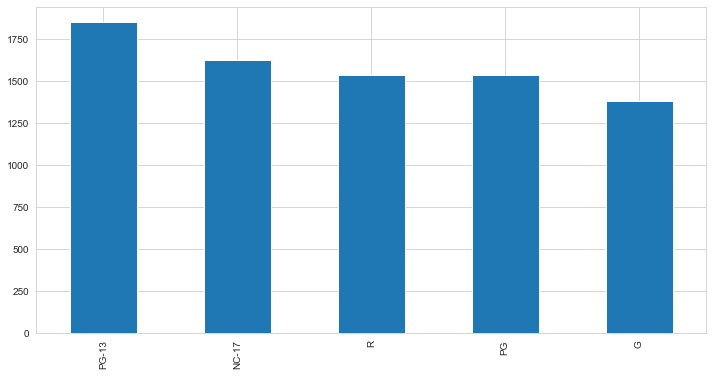

In [110]:
df.loc[df['rental_store_city'] == 'Lethbridge']['film_rating'].value_counts().plot(kind = 'bar', figsize = (12, 6))

In [125]:
# The number of rentals made in Woodridge with rental duration higher than 5 days: 3186
df.loc[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3186 entries, 2 to 16046
Data columns (total 12 columns):
rental_date               3186 non-null datetime64[ns]
return_date               3153 non-null datetime64[ns]
customer_lastname         3186 non-null object
store_id                  3186 non-null int64
rental_store_city         3186 non-null object
film_title                3186 non-null object
film_rental_duration      3186 non-null int64
film_rental_rate          3186 non-null float64
film_replacement_cost     3186 non-null float64
film_rating               3186 non-null object
rental_days               3153 non-null float64
film_daily_rental_rate    3186 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(2), object(4)
memory usage: 323.6+ KB


In [128]:
# The number of rentals that were made at the store with ID 2 or with replacement cost lower than $10.99: 8444
df.loc[(df['store_id'] == 2) | (df['film_replacement_cost'] < 10.99)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8444 entries, 2 to 16049
Data columns (total 12 columns):
rental_date               8444 non-null datetime64[ns]
return_date               8350 non-null datetime64[ns]
customer_lastname         8444 non-null object
store_id                  8444 non-null int64
rental_store_city         8444 non-null object
film_title                8444 non-null object
film_rental_duration      8444 non-null int64
film_rental_rate          8444 non-null float64
film_replacement_cost     8444 non-null float64
film_rating               8444 non-null object
rental_days               8350 non-null float64
film_daily_rental_rate    8444 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(2), object(4)
memory usage: 857.6+ KB
